#**ANALISIS DAN PREDIKSI TELCO CHURN**

In [1]:
# Import Library Data Handling
import pandas as pd # Memuat dan manipulasi data (dataframe)
import numpy as np # Memuat dan manipulasi data numerik
import matplotlib.pyplot as plt # Untuk plotting/visualisasi dasar
import seaborn as sns # Visualisasi data lebih canggih

# Set seaborn tampil lebih cantik
sns.set_theme(style="whitegrid")

# Import Library Fitur Engineering
from sklearn.model_selection import train_test_split # Untuk membagi dataset
from sklearn.preprocessing import StandardScaler, MinMaxScaler # Scaling data numerik
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder # Endcoding data kategorikal
from sklearn.compose import ColumnTransformer # Menggabung proses scaling & encoding
from sklearn.pipeline import Pipeline # Membuat workflow
from sklearn.impute import SimpleImputer

from imblearn.over_sampling import SMOTE # Menangani data tidak seimbang

# 5 Model Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

# Evaluasi model
from sklearn.metrics import (
    classification_report,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    roc_auc_score,
    roc_curve
)

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score

# Interpretasi model (XAI)
import shap # Mengetahui pengaruh fitur terhadap prediksi

# Utility
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Membaca file csv
df = pd.read_csv('/content/sample_data/telco.csv')

df.head() # Menampilkan 5 baris pertama

,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,...,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,Male,78,No,Yes,No,No,0,United States,California,...,20,0.00,59.65,3,Churned,Yes,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,Female,74,No,Yes,Yes,Yes,1,United States,California,...,0,390.80,1024.10,3,Churned,Yes,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,Male,71,No,Yes,No,Yes,3,United States,California,...,0,203.94,1910.88,2,Churned,Yes,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,Female,78,No,Yes,Yes,Yes,1,United States,California,...,0,494.00,2995.07,2,Churned,Yes,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,Female,80,No,Yes,Yes,Yes,1,United States,California,...,0,234.21,3102.36,2,Churned,Yes,67,2793,Price,Extra data charges


In [3]:
df.info() # Ringkasan struktrur data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 50 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Under 30                           7043 non-null   object 
 4   Senior Citizen                     7043 non-null   object 
 5   Married                            7043 non-null   object 
 6   Dependents                         7043 non-null   object 
 7   Number of Dependents               7043 non-null   int64  
 8   Country                            7043 non-null   object 
 9   State                              7043 non-null   object 
 10  City                               7043 non-null   object 
 11  Zip Code                           7043 non-null   int64

In [4]:
df.describe() # Statistik deskriptif

,Age,Number of Dependents,Zip Code,Latitude,Longitude,Population,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Churn Score,CLTV
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,0.468692,93486.070567,36.197455,-119.756684,22139.603294,1.951867,32.386767,22.958954,20.515405,64.761692,2280.381264,1.962182,6.860713,749.099262,3034.379056,3.244924,58.505040,4400.295755
std,16.750352,0.962802,1856.767505,2.468929,2.154425,21152.392837,3.001199,24.542061,15.448113,20.418940,30.090047,2266.220462,7.902614,25.104978,846.660055,2865.204542,1.201657,21.170031,1183.057152
min,19.000000,0.000000,90001.000000,32.555828,-124.301372,11.000000,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,21.360000,1.000000,5.000000,2003.000000
25%,32.000000,0.000000,92101.000000,33.990646,-121.788090,2344.000000,0.000000,9.000000,9.210000,3.000000,35.500000,400.150000,0.000000,0.000000,70.545000,605.610000,3.000000,40.000000,3469.000000
50%,46.000000,0.000000,93518.000000,36.205465,-119.595293,17554.000000,0.000000,29.000000,22.890000,17.000000,70.350000,1394.550000,0.000000,0.000000,401.440000,2108.640000,3.000000,61.000000,4527.000000
75%,60.000000,0.000000,95329.000000,38.161321,-117.969795,36125.000000,3.000000,55.000000,36.395000,27.000000,89.850000,3786.600000,0.000000,0.000000,1191.100000,4801.145000,4.000000,75.500000,5380.500000
max,80.000000,9.000000,96150.000000,41.962127,-114.192901,105285.000000,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000,5.000000,96.000000,6500.000000


In [5]:
df.duplicated().sum() # Cek duplikat

np.int64(0)

In [6]:
# Menghapus kolom yang kurang relevan
df = df.drop(['Customer ID', 'Churn Score', 'CLTV', 'Churn Category', 'Churn Reason', 'Customer Status', 'Zip Code', 'Latitude', 'Longitude', 'City', 'Population', 'Country', 'State', 'Quarter'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 36 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             7043 non-null   object 
 1   Age                                7043 non-null   int64  
 2   Under 30                           7043 non-null   object 
 3   Senior Citizen                     7043 non-null   object 
 4   Married                            7043 non-null   object 
 5   Dependents                         7043 non-null   object 
 6   Number of Dependents               7043 non-null   int64  
 7   Referred a Friend                  7043 non-null   object 
 8   Number of Referrals                7043 non-null   int64  
 9   Tenure in Months                   7043 non-null   int64  
 10  Offer                              3166 non-null   object 
 11  Phone Service                      7043 non-null   objec

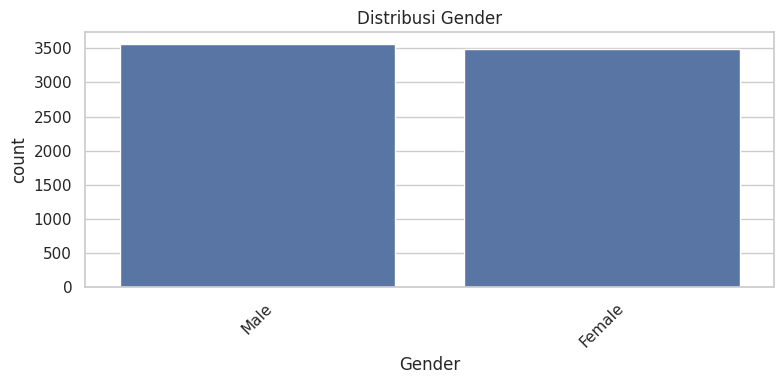

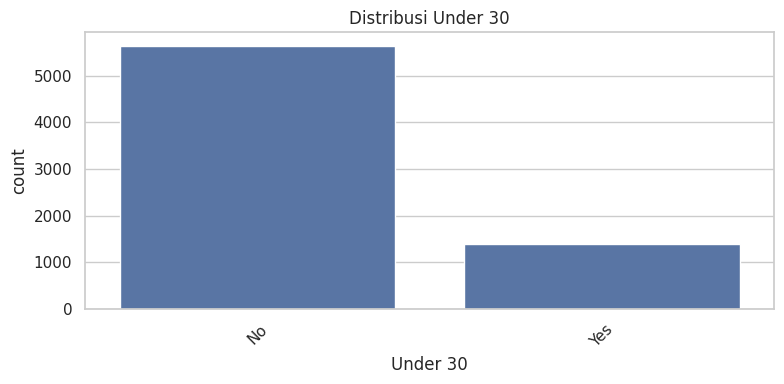

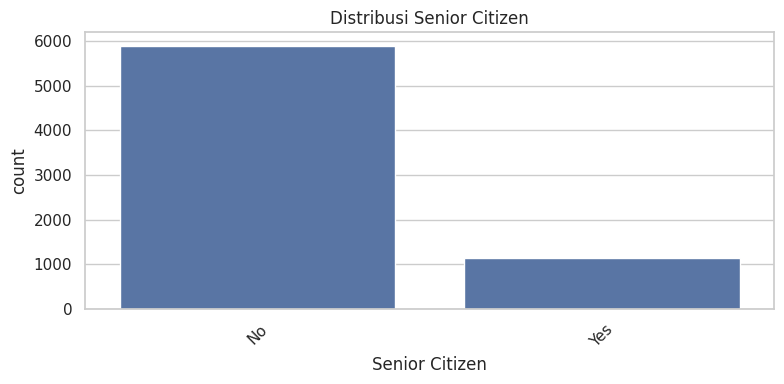

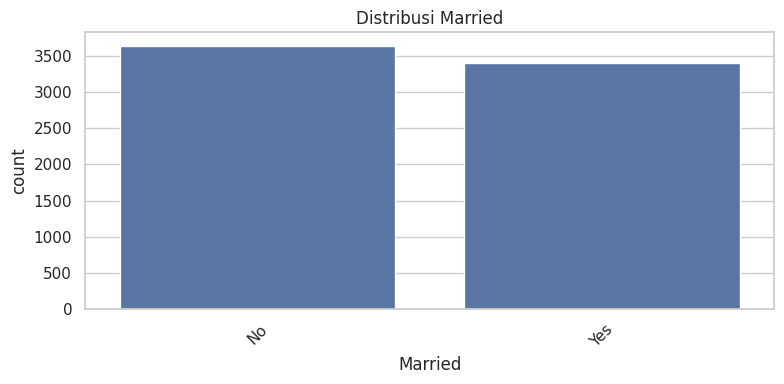

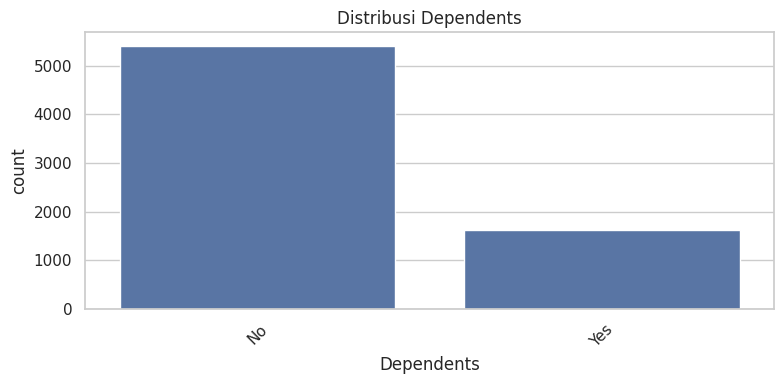

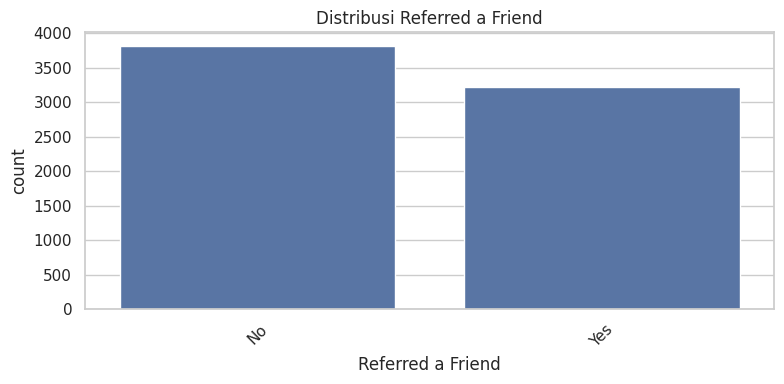

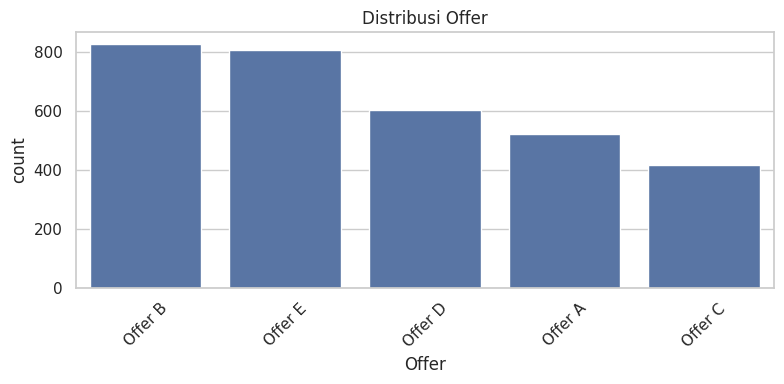

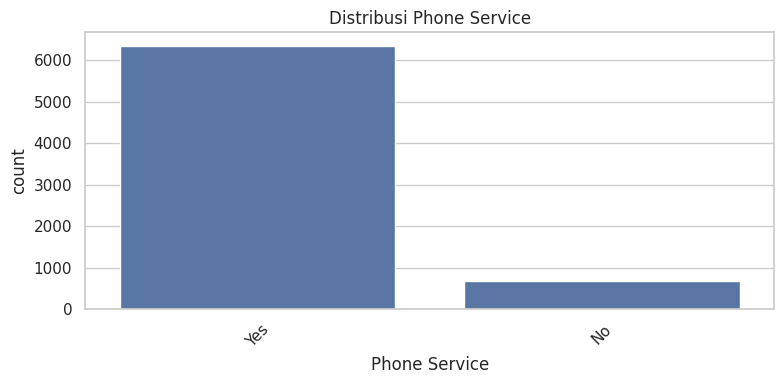

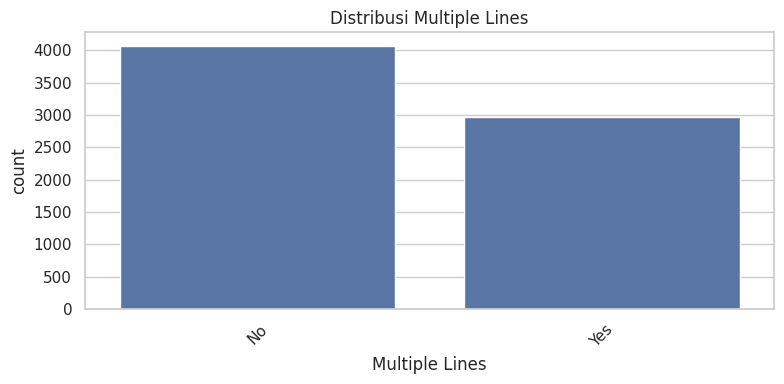

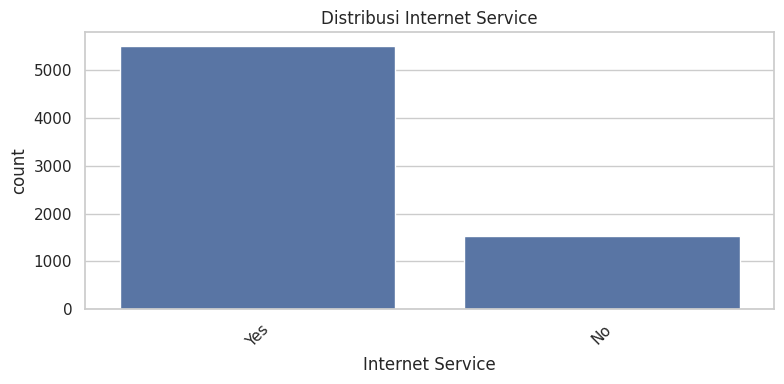

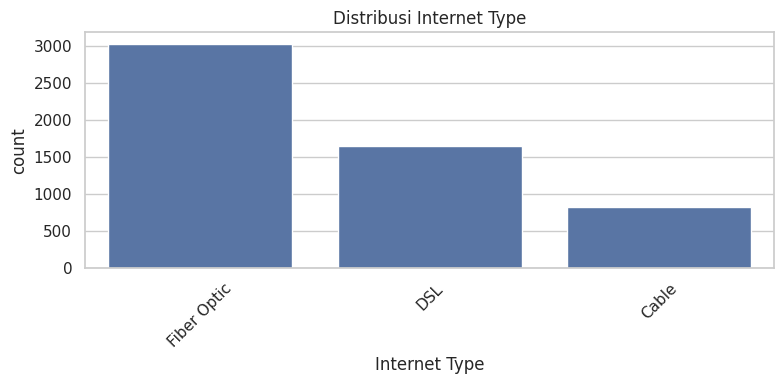

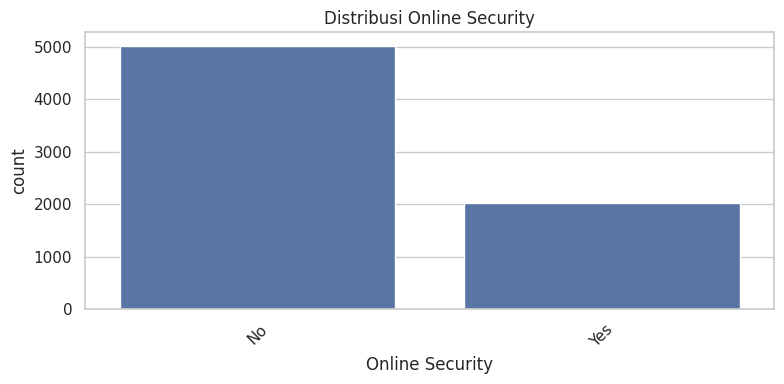

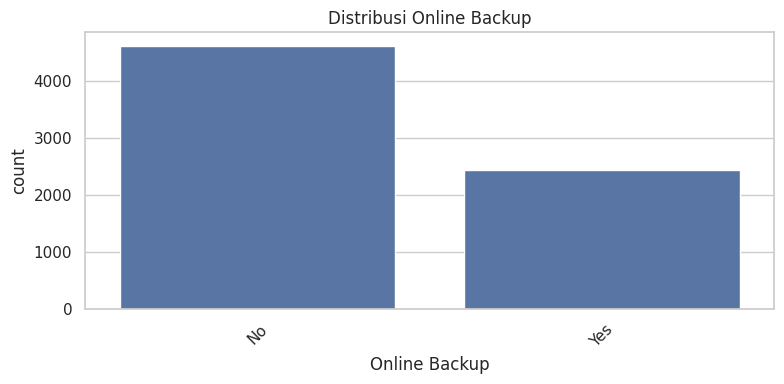

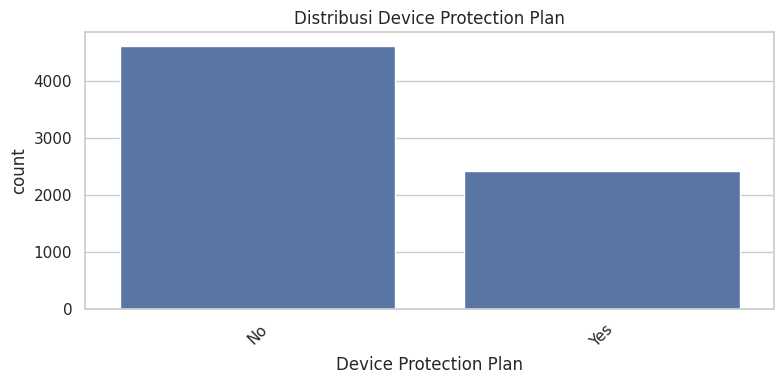

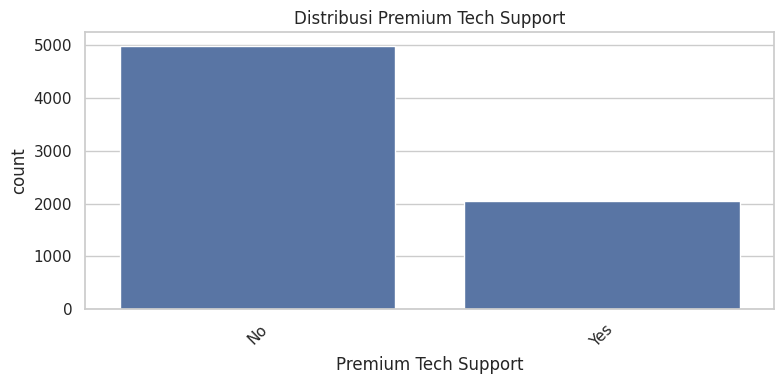

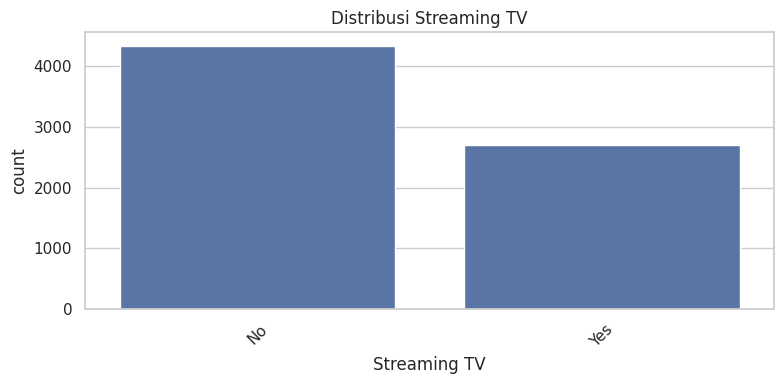

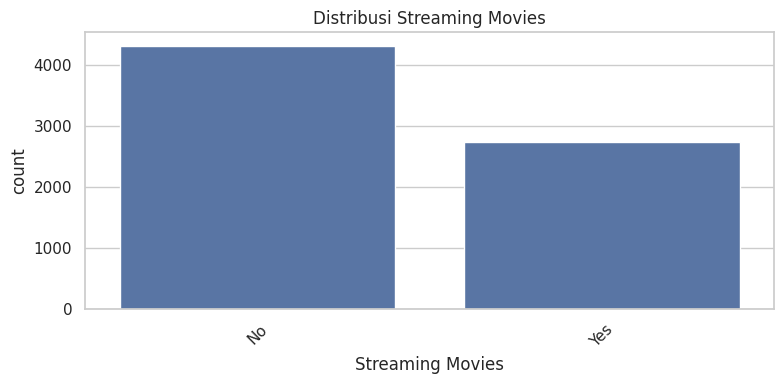

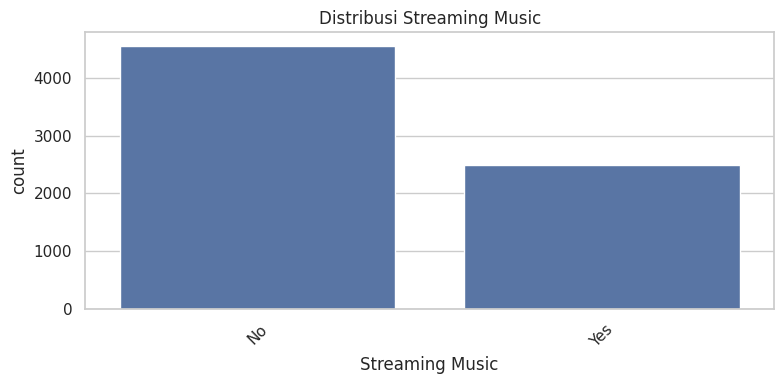

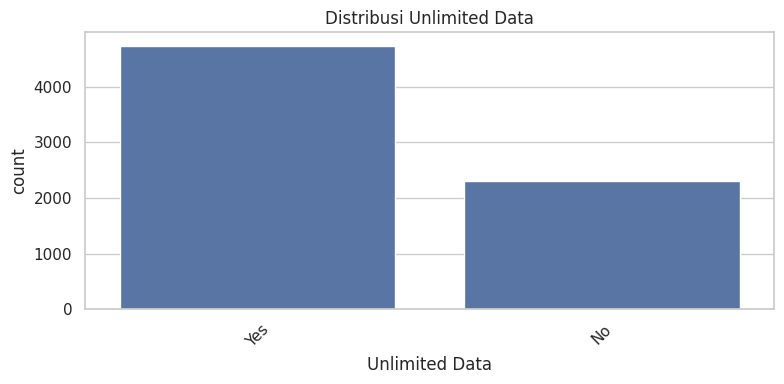

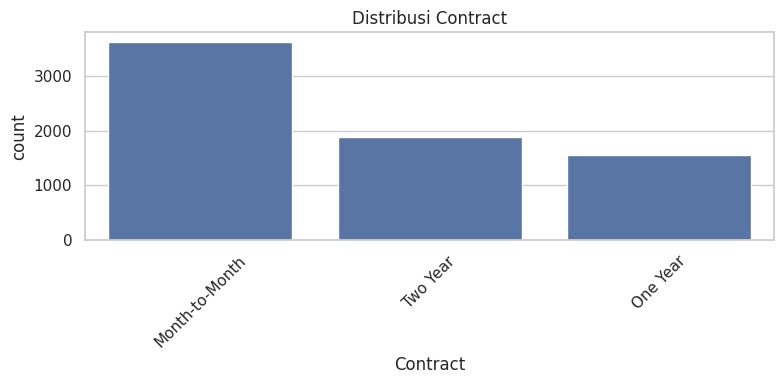

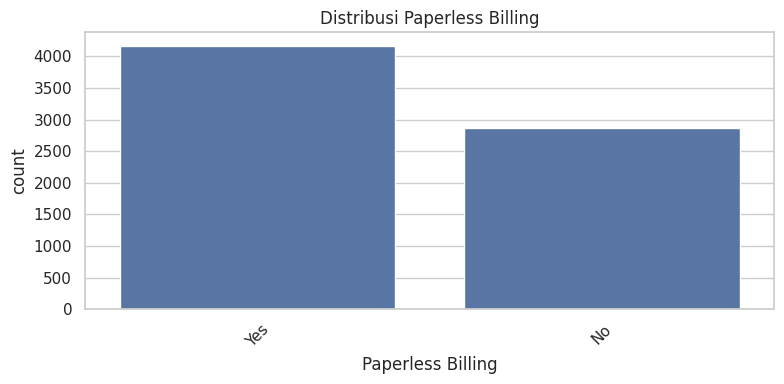

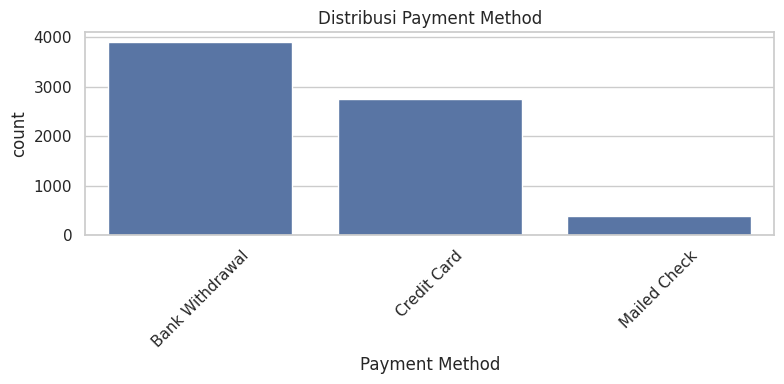

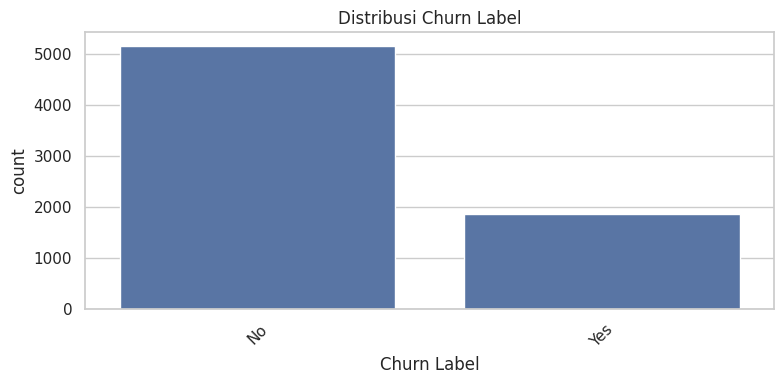

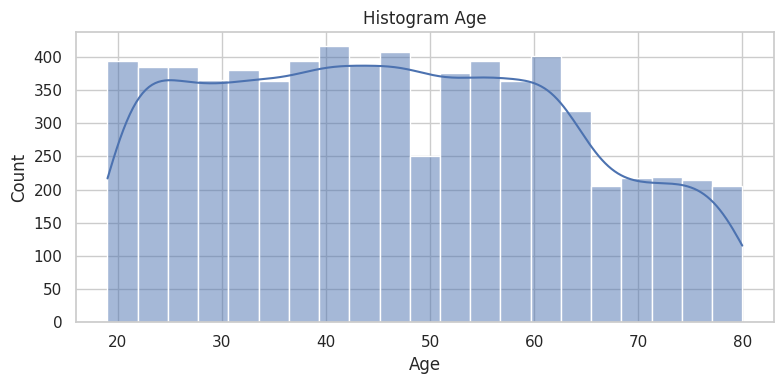

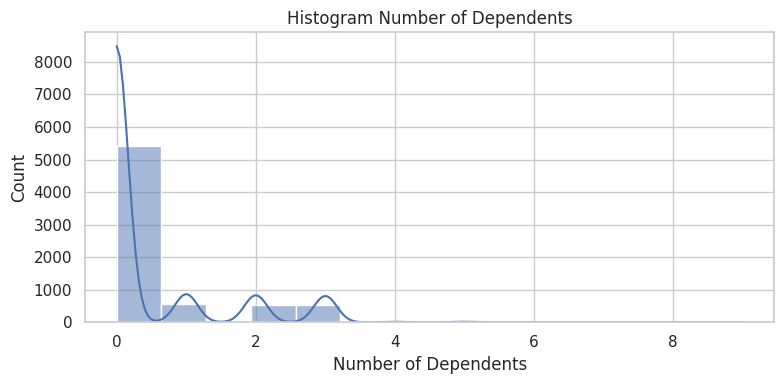

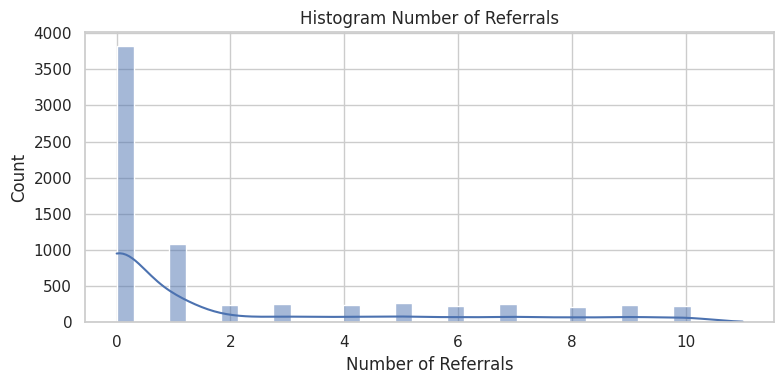

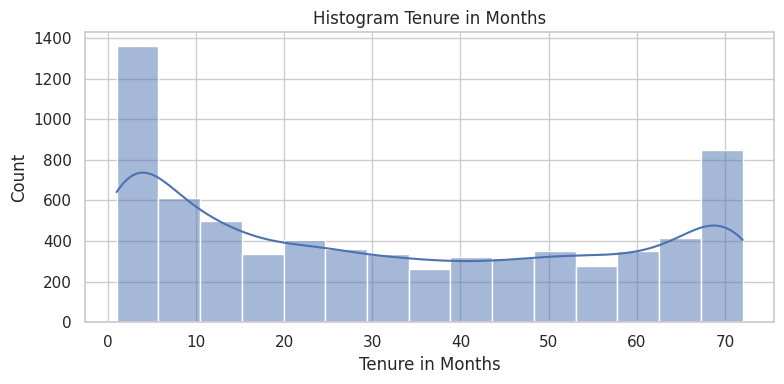

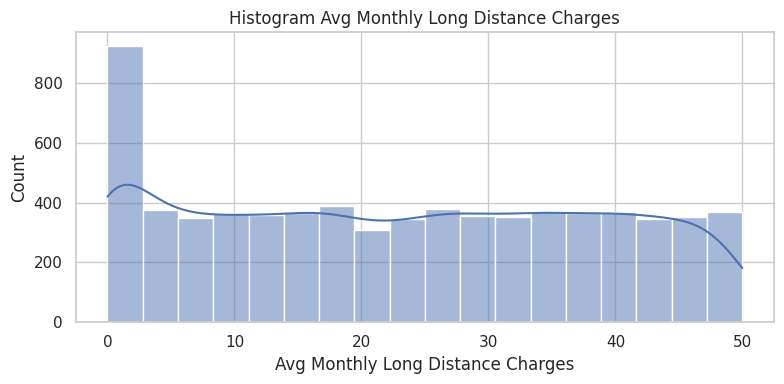

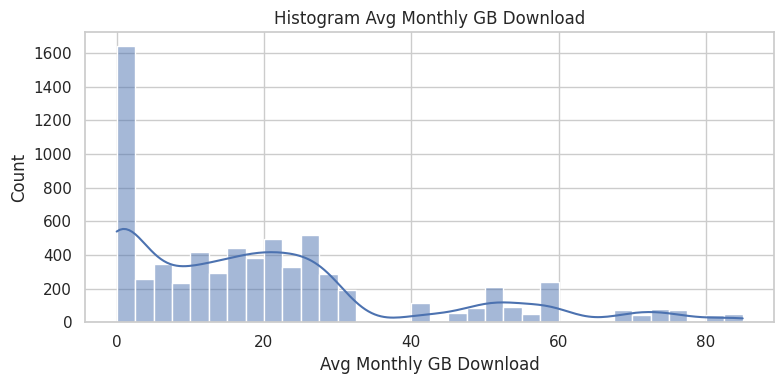

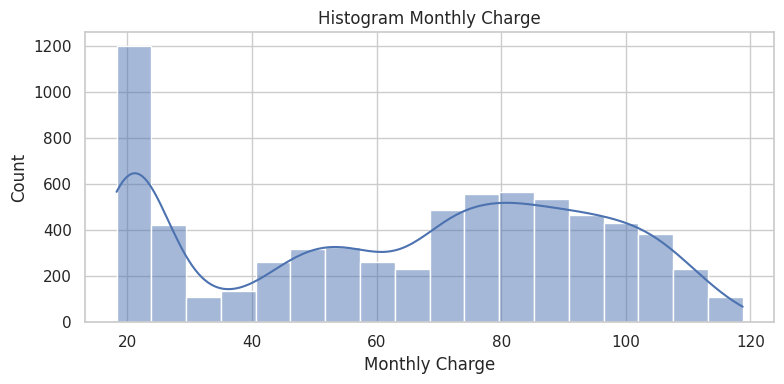

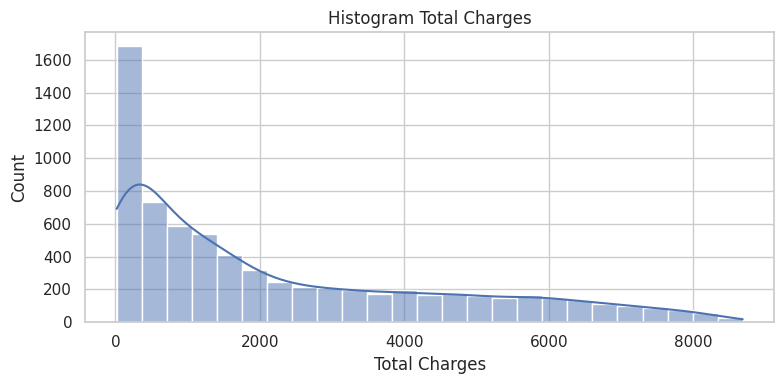

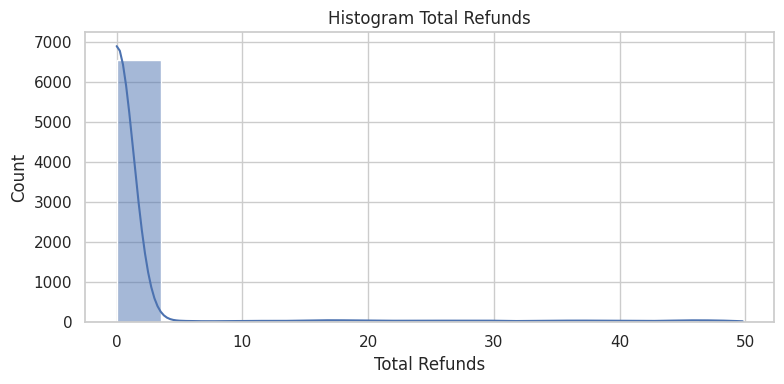

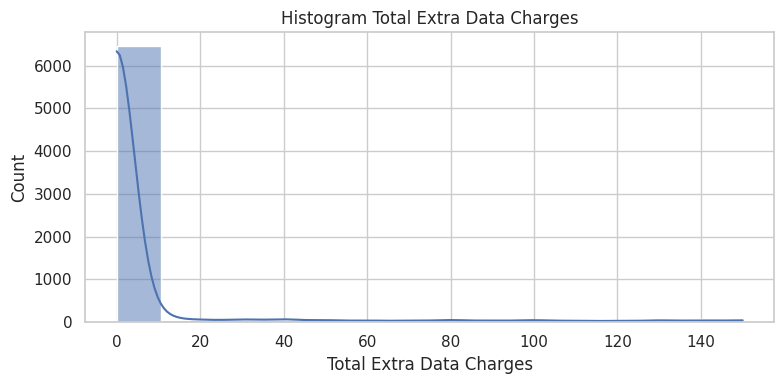

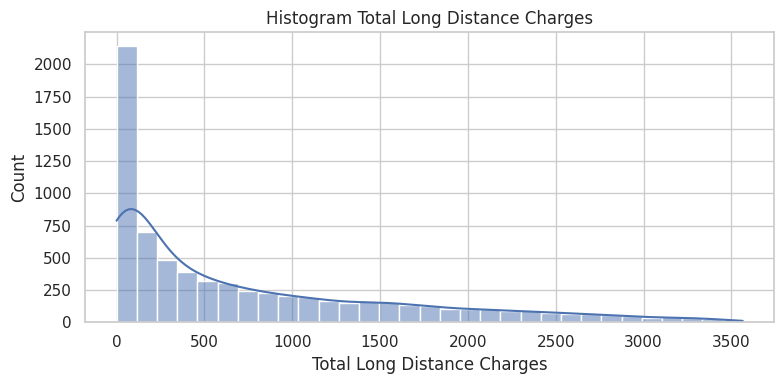

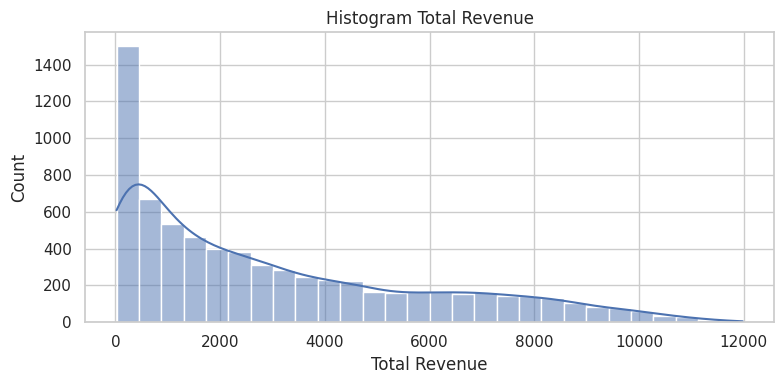

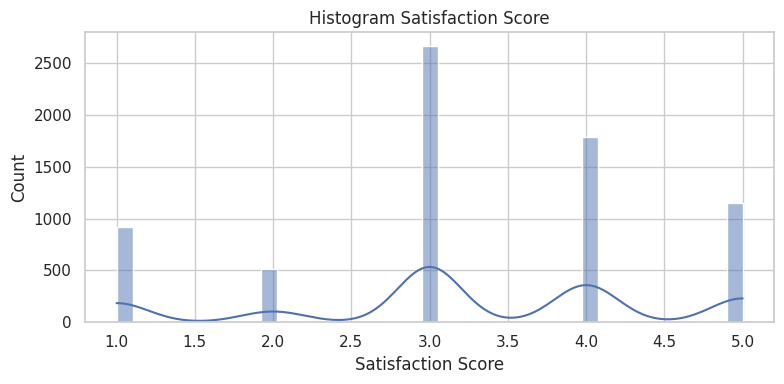

In [7]:
# Pisahkan fitur numerik dan kategorikal
cat_cols = df.select_dtypes(include='object').columns.tolist()
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Plot diagram batang untuk fitur kategorikal
for col in cat_cols:
  plt.figure(figsize=(8, 4))
  sns.countplot(data=df, x=col, order=df[col].value_counts().index)
  plt.title(f'Distribusi {col}')
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()

# Plot histogram untuk numerik
for col in num_cols:
  plt.figure(figsize=(8, 4))
  sns.histplot(data=df, x=col, kde=True)
  plt.title(f'Histogram {col}')
  plt.tight_layout()
  plt.show()


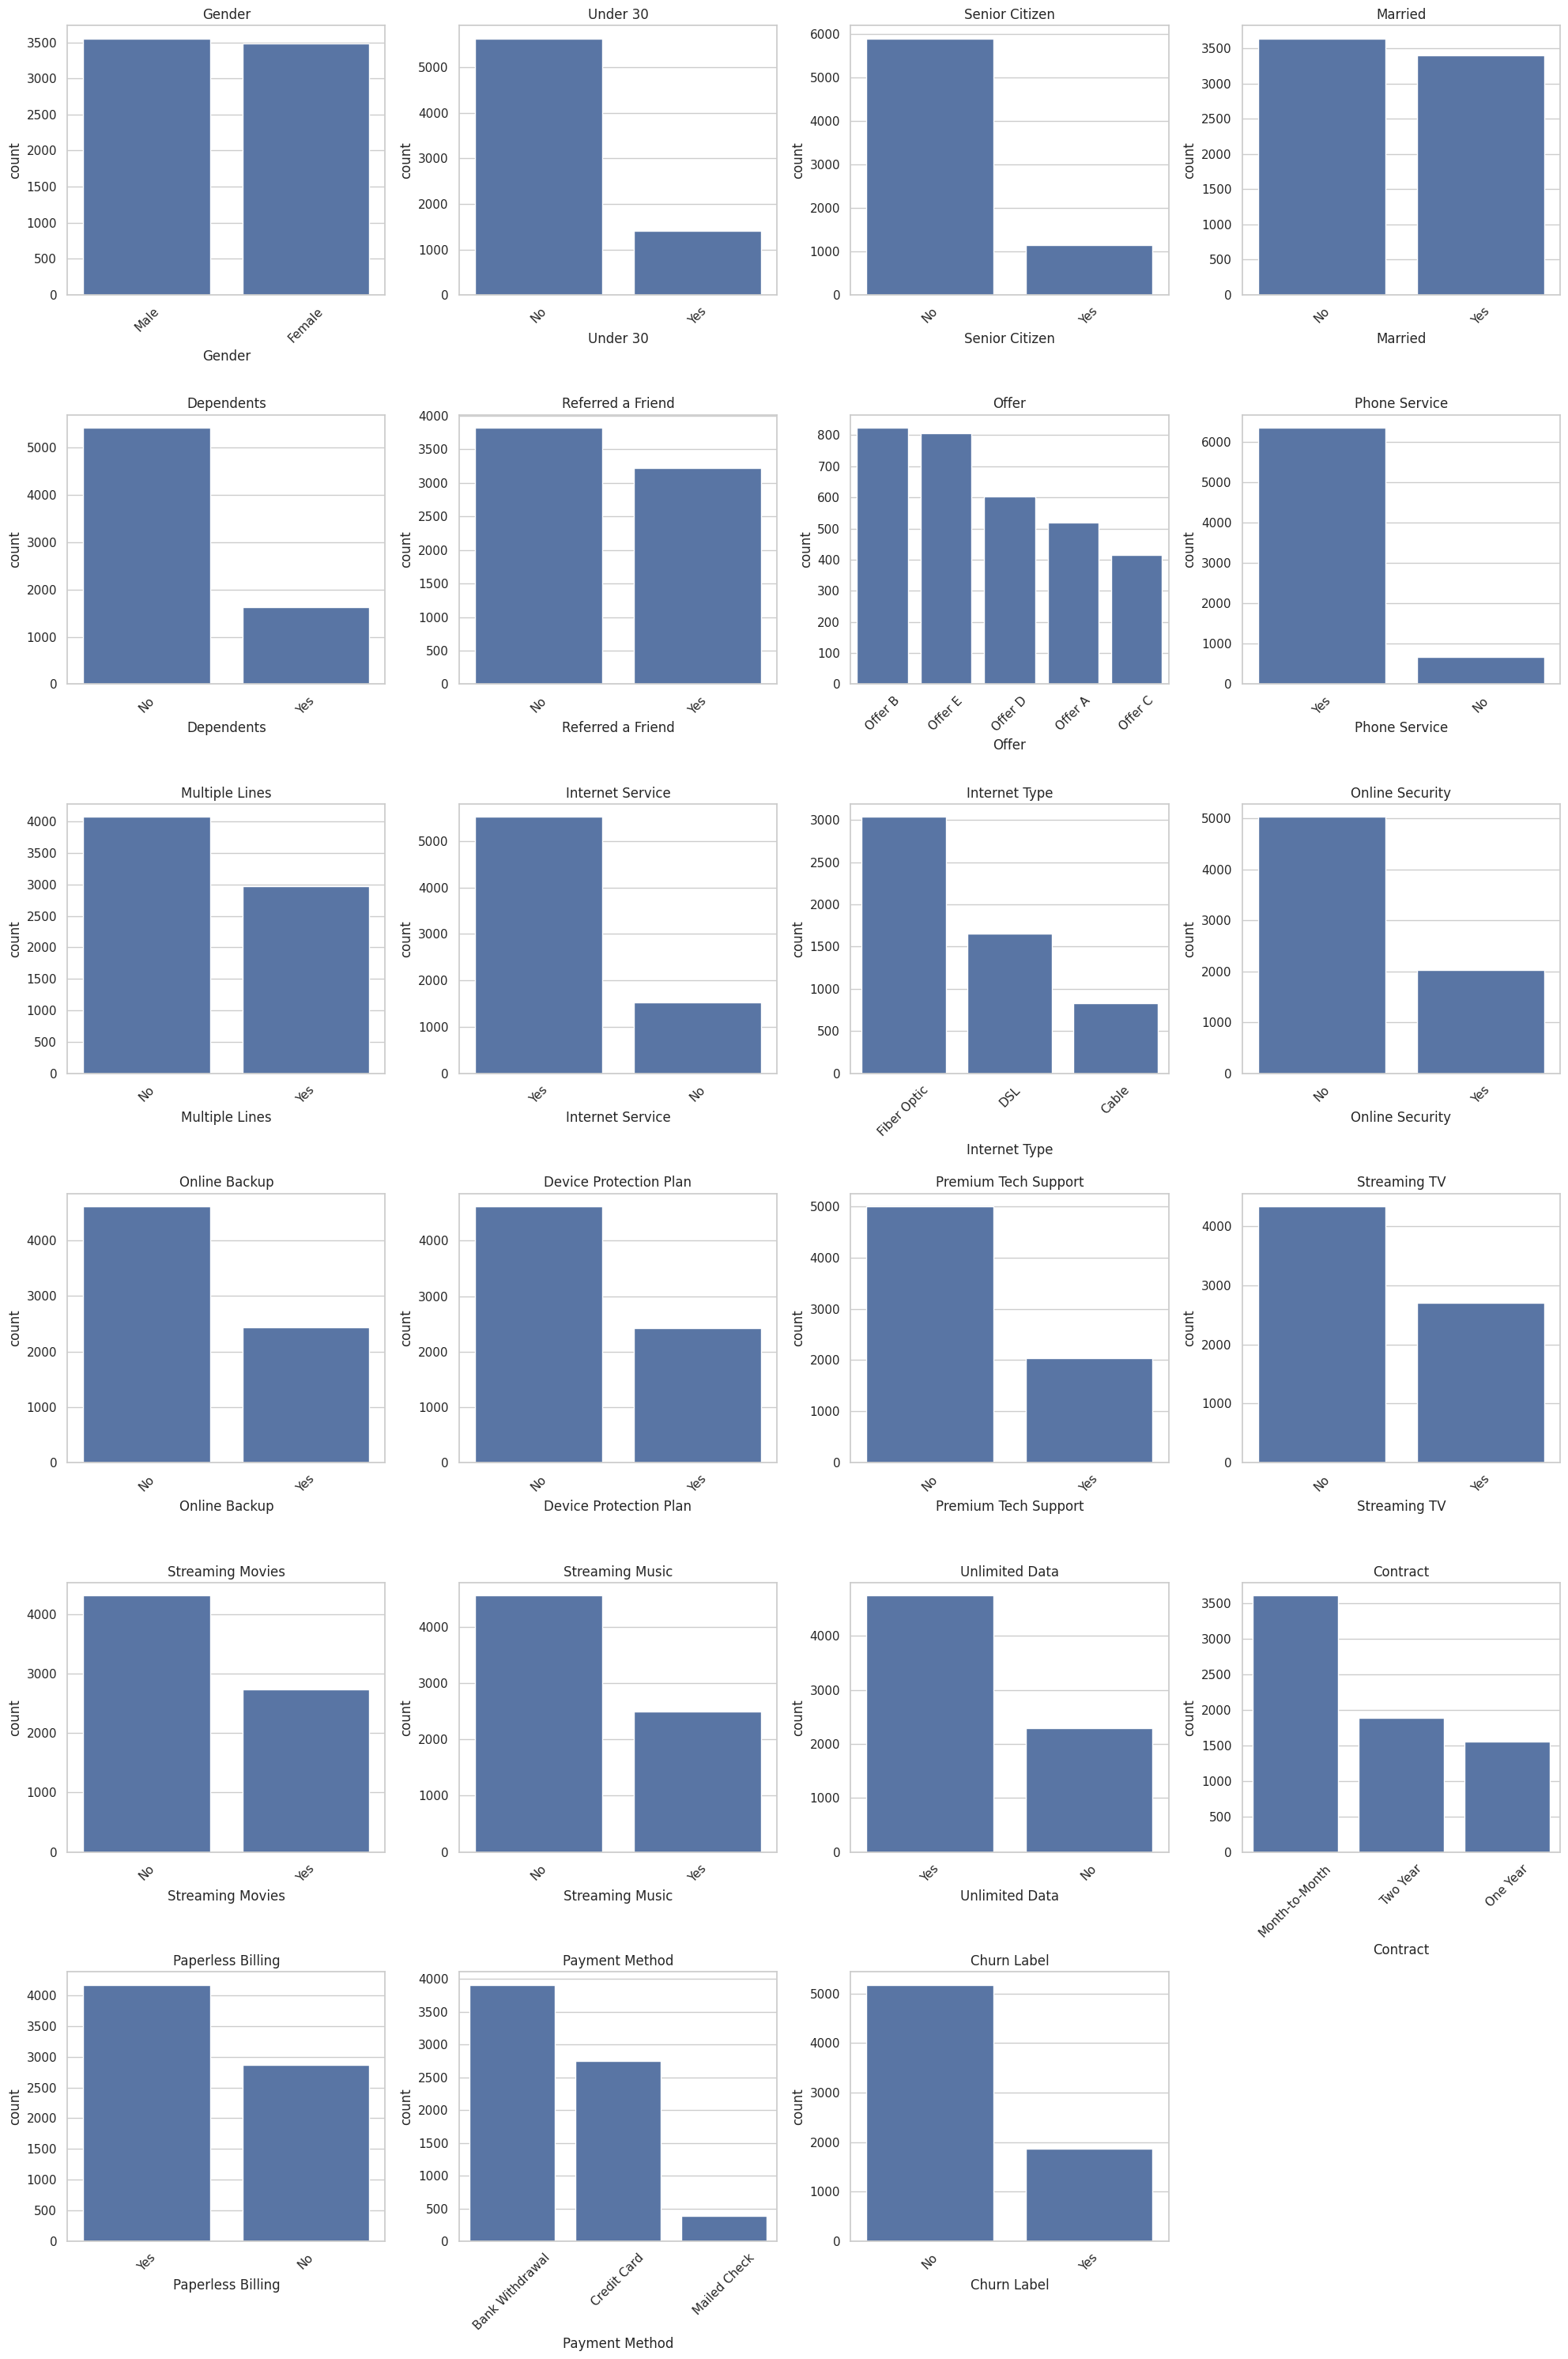

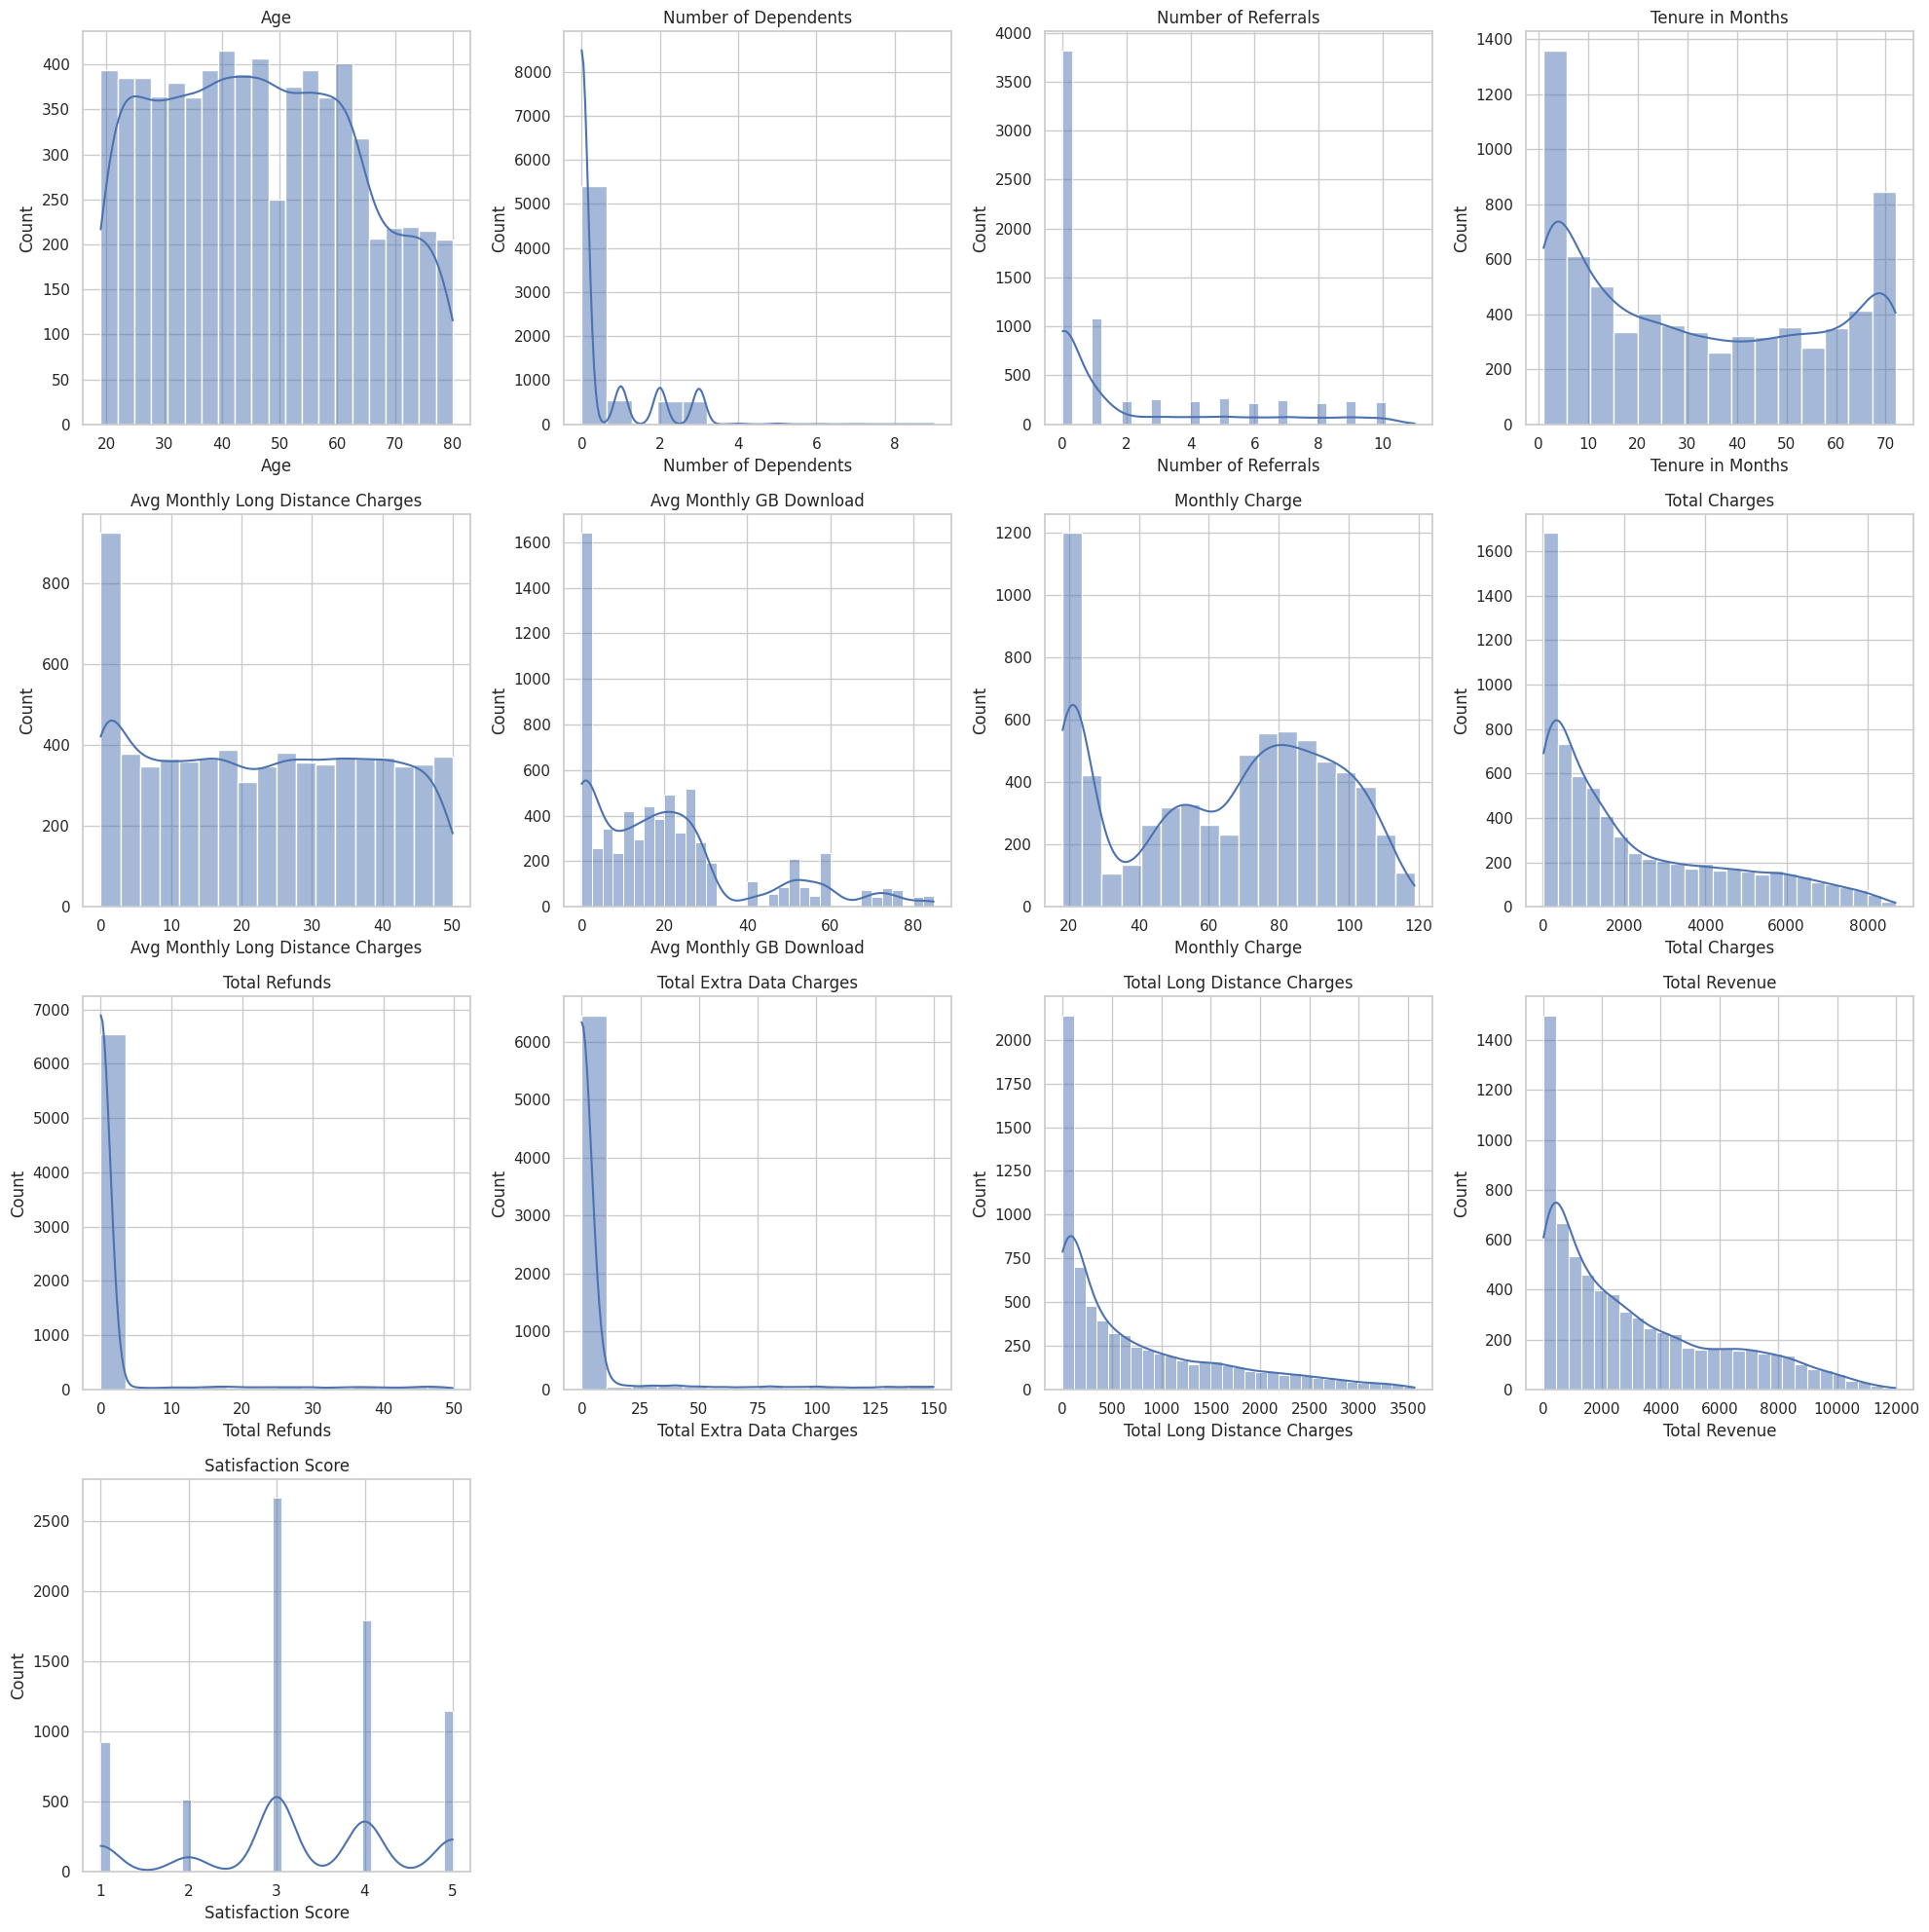

In [8]:
# --- Diagram Batang untuk Kategorikal ---
n_cat = len(cat_cols)
rows_cat = (n_cat // 4) + 1  # 4 kolom per baris
fig_cat, axes_cat = plt.subplots(rows_cat, 4, figsize=(20, 5 * rows_cat))
axes_cat = axes_cat.flatten()

for i, col in enumerate(cat_cols):
    sns.countplot(data=df, x=col, ax=axes_cat[i], order=df[col].value_counts().index)
    axes_cat[i].set_title(f'{col}')
    axes_cat[i].tick_params(axis='x', rotation=45)

# Kosongkan subplot yang tidak terpakai
for j in range(i + 1, len(axes_cat)):
    fig_cat.delaxes(axes_cat[j])

plt.tight_layout()
plt.show()

# --- Histogram untuk Numerik ---
n_num = len(num_cols)
rows_num = (n_num // 4) + 1  # 4 kolom per baris
fig_num, axes_num = plt.subplots(rows_num, 4, figsize=(20, 5 * rows_num))
axes_num = axes_num.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(data=df, x=col, ax=axes_num[i], kde=True)
    axes_num[i].set_title(f'{col}')

# Kosongkan subplot yang tidak terpakai
for j in range(i + 1, len(axes_num)):
    fig_num.delaxes(axes_num[j])

plt.tight_layout()
plt.show()

1.  Sekitar 5200 tidak churn dan 1800an churn
2.  Contract MtM = 3600 an, TY = 1900an, Oy = 1500an
Payment metohod Bw = 3800 an, CC= 2700 an, Mc = 400 an
Gender M = 3500 an, F = 3480 an
Internet Serivice  yes = 5300an , no = 1500an
3. Iya tenure rendah sering churn. Ya yang MTm churn paling tinggi, ya yang paling tinggi montly chargenya sering churn . sisanya yang numerik sulit di tulis karena terlalu panjang

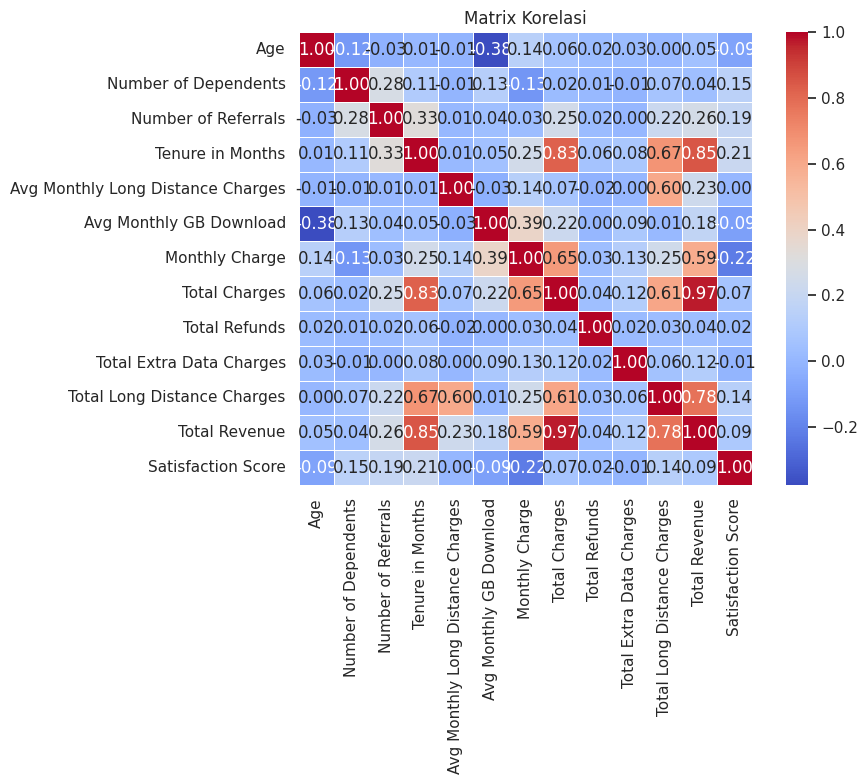

In [9]:
# Ambil subset DataFrame hanya numerik
num_cols = df.select_dtypes(include=['int64', 'float64'])

# Hitung korelasi
cor_matrix = num_cols.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cor_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title('Matrix Korelasi')
plt.tight_layout()
plt.show()

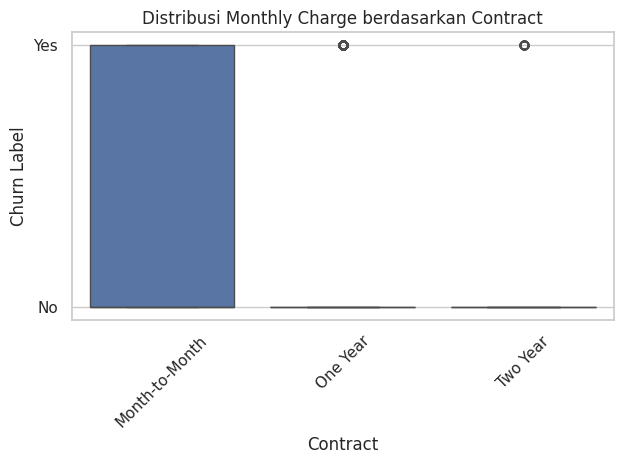

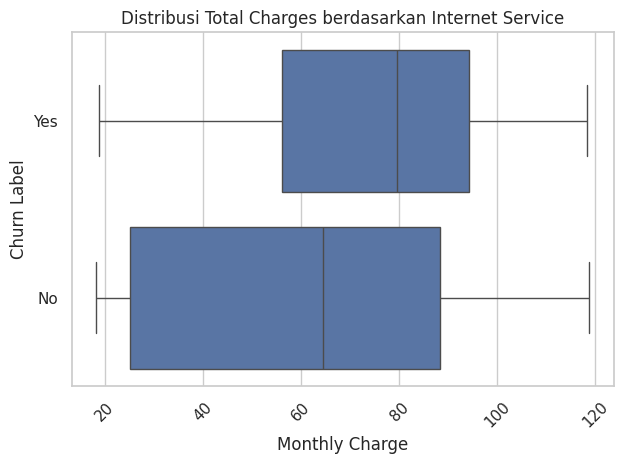

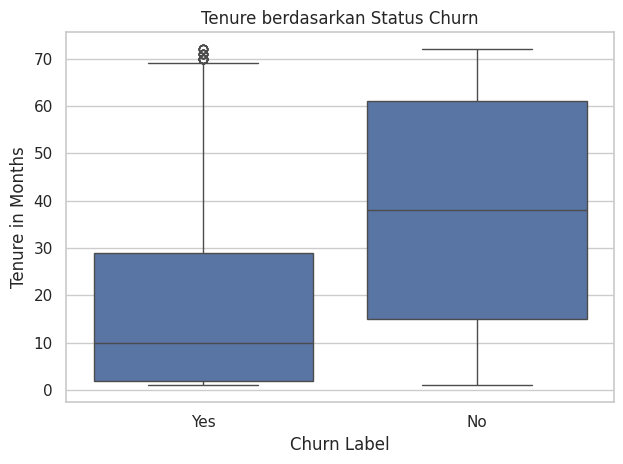

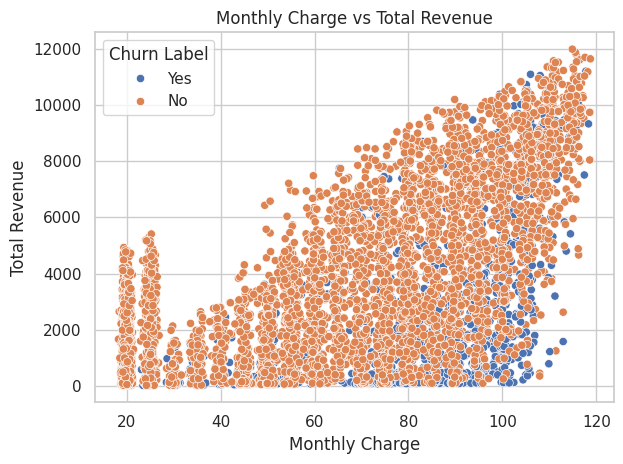

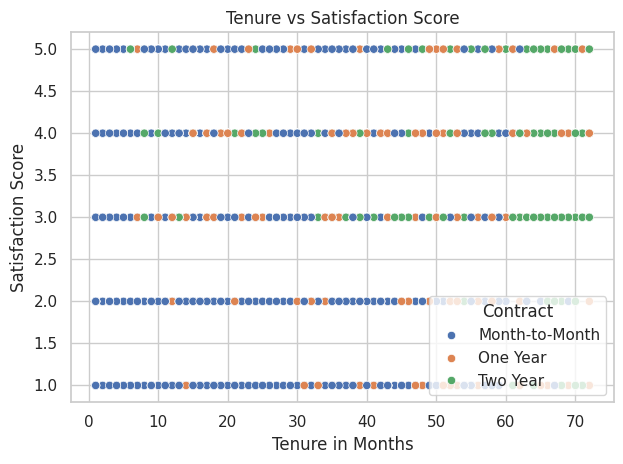

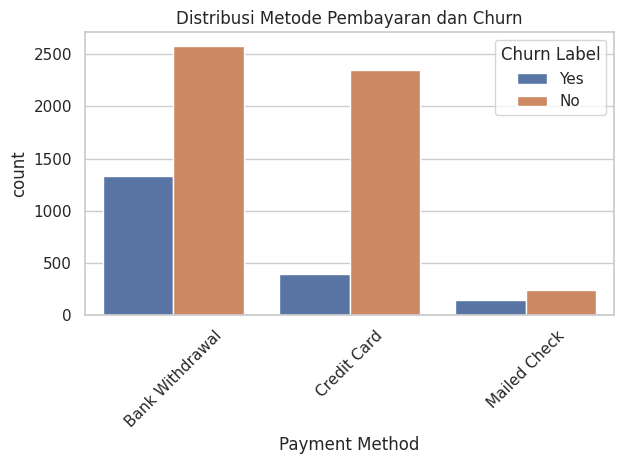

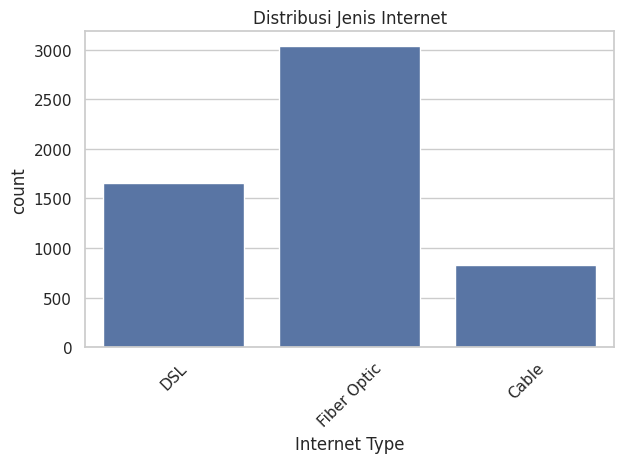

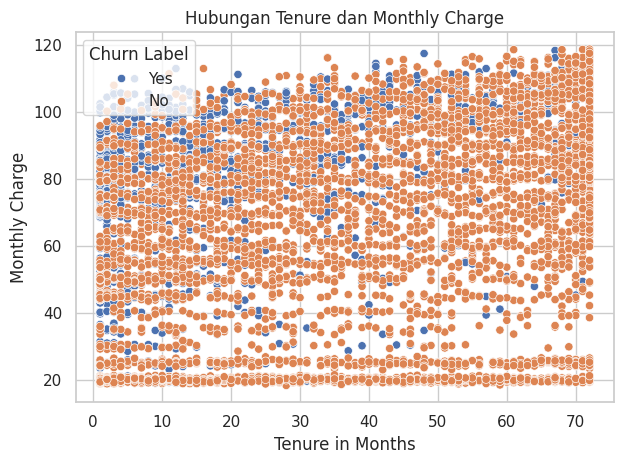

In [10]:
sns.boxplot(data=df, x='Contract', y='Churn Label')
plt.title('Distribusi Monthly Charge berdasarkan Contract')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

sns.boxplot(data=df, x='Monthly Charge', y='Churn Label')
plt.title('Distribusi Total Charges berdasarkan Internet Service')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

sns.boxplot(data=df, x='Churn Label', y='Tenure in Months')
plt.title('Tenure berdasarkan Status Churn')
plt.tight_layout()
plt.show()

sns.scatterplot(data=df, x='Monthly Charge', y='Total Revenue', hue='Churn Label')
plt.title('Monthly Charge vs Total Revenue')
plt.tight_layout()
plt.show()

sns.scatterplot(data=df, x='Tenure in Months', y='Satisfaction Score', hue='Contract')
plt.title('Tenure vs Satisfaction Score')
plt.tight_layout()
plt.show()

sns.countplot(data=df, x='Payment Method', hue='Churn Label')
plt.title('Distribusi Metode Pembayaran dan Churn')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

sns.countplot(data=df, x='Internet Type')
plt.title('Distribusi Jenis Internet')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

sns.scatterplot(data=df, x='Tenure in Months', y='Monthly Charge', hue='Churn Label')
plt.title('Hubungan Tenure dan Monthly Charge')
plt.tight_layout()
plt.show()


In [11]:
# 1. Definisikan kolom fitur
X = df.drop(columns=['Churn Label']) # (dan kolom-kolom Grup 1 lainnya)

# 2. Definisikan kolom target
# Kita ubah 'Yes'/'No' menjadi 1/0 SEKARANG
y = df['Churn Label'].map({'Yes': 1, 'No': 0})

# 3. Lakukan Pembagian Data
print(f"Bentuk X (fitur) mentah: {X.shape}")
print(f"Bentuk y (target): {y.shape}")
print("\nMelakukan train_test_split...")

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,    # 20% data untuk testing, 80% untuk training
    random_state=42,  # Angka 'kunci' agar hasil split kita selalu sama
    stratify=y        # PENTING: Menjaga proporsi 'churn' di train & test
)

# 4. Verifikasi Hasil Split
print("Split selesai.")
print(f"Bentuk X_train: {X_train.shape}")
print(f"Bentuk X_test: {X_test.shape}")

# Sekarang kode ini akan BERHASIL karena y_train berisi 1 dan 0
print(f"\nProporsi Churn (1) di y_train: {y_train.mean():.2f}")
print(f"Proporsi Churn (1) di y_test:  {y_test.mean():.2f}")

Bentuk X (fitur) mentah: (7043, 35)
Bentuk y (target): (7043,)

Melakukan train_test_split...
Split selesai.
Bentuk X_train: (5634, 35)
Bentuk X_test: (1409, 35)

Proporsi Churn (1) di y_train: 0.27
Proporsi Churn (1) di y_test:  0.27


In [12]:
# 1. Identifikasi kolom berdasarkan PERLAKUAN-nya (ini lebih detail)
numerical_features = X_train.select_dtypes(include=np.number).columns
try:
    # Hapus 'Satisfaction Score' & 'Contract' (jika sudah kamu map)
    # dari daftar numerik
    numerical_features = numerical_features.drop(['Satisfaction Score', 'Contract'])
except KeyError:
    numerical_features = numerical_features.drop('Satisfaction Score')
    pass

# Pisahkan 'Contract' sebagai ORINAL
ordinal_features = ['Contract']
contract_categories = [['Month-to-Month', 'One Year', 'Two Year']]

# Pisahkan semua kolom kategorikal (teks)
# (termasuk 'Offer' yang ada NaN-nya)
categorical_features = X_train.select_dtypes(include=['object']).columns
categorical_features = categorical_features.drop('Contract')


print(f"Kolom Numerik (di-scale): {list(numerical_features)}")
print(f"Kolom Ordinal (di-map): {ordinal_features}")
print(f"Kolom Kategorikal (di-impute & OHE): {list(categorical_features)}")
print("('Satisfaction Score' akan dibiarkan apa adanya/'passthrough')")


# 2. Buat Pipeline kecil untuk setiap perlakuan
# Pipeline untuk NUMERIK (Sama seperti sebelumnya)
numeric_transformer = StandardScaler()

# Pipeline untuk ORDINAL
ordinal_transformer = OrdinalEncoder(categories=contract_categories)

# Pipeline untuk KATEGORIKAL
categorical_transformer = Pipeline(steps=[
    # Step 1: Isi NaN (misal 'Offer' NaN) dengan 'None'
    ('imputer', SimpleImputer(strategy='constant', fill_value='None')),
    # Step 2: One-Hot Encode sisanya
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='if_binary'))
])

# 3. Buat "Cetakan" Preprocessing GABUNGAN
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('ord', ordinal_transformer, ordinal_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough' # Biarkan 'Satisfaction Score' lewat
)

# 4. Fit (Belajar) HANYA pada X_train
print("\nFitting preprocessor GABUNGAN HANYA pada X_train...")
preprocessor.fit(X_train)

# 5. Transform (Terapkan) pada X_train dan X_test
print("Transforming X_train dan X_test...")
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print("\nPreprocessing GABUNGAN selesai.")
print(f"Bentuk X_train_processed: {X_train_processed.shape}")
print(f"Bentuk X_test_processed: {X_test_processed.shape}")
print("\nContoh 5 baris pertama X_train_processed (format array):")
print(X_train_processed[:5])

Kolom Numerik (di-scale): ['Age', 'Number of Dependents', 'Number of Referrals', 'Tenure in Months', 'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download', 'Monthly Charge', 'Total Charges', 'Total Refunds', 'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Revenue']
Kolom Ordinal (di-map): ['Contract']
Kolom Kategorikal (di-impute & OHE): ['Gender', 'Under 30', 'Senior Citizen', 'Married', 'Dependents', 'Referred a Friend', 'Offer', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Internet Type', 'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Paperless Billing', 'Payment Method']
('Satisfaction Score' akan dibiarkan apa adanya/'passthrough')

Fitting preprocessor GABUNGAN HANYA pada X_train...
Transforming X_train dan X_test...

Preprocessing GABUNGAN selesai.
Bentuk X_train_processed: (5634, 45)
Bentuk X_test_processed: (1409, 45)

Contoh 5 

In [13]:
print("\nFASE 4: Menyimpan file CSV yang sudah diproses...")

# 1. Dapatkan nama-nama fitur baru dari 'preprocessor'
try:
    feature_names = preprocessor.get_feature_names_out()
    print(f"Berhasil mendapatkan {len(feature_names)} nama fitur baru.")
except Exception as e:
    print(f"Error saat mengambil nama fitur: {e}")
    # Fallback jika get_feature_names_out gagal
    feature_names = [f"feature_{i}" for i in range(X_train_processed.shape[1])]

# 2. Rekonstruksi DataFrame (dari array NumPy) dengan nama kolom yang benar
if hasattr(X_train_processed, "toarray"):
    X_train_processed_df = pd.DataFrame(X_train_processed.toarray(), columns=feature_names)
    X_test_processed_df = pd.DataFrame(X_test_processed.toarray(), columns=feature_names)
else:
    X_train_processed_df = pd.DataFrame(X_train_processed, columns=feature_names)
    X_test_processed_df = pd.DataFrame(X_test_processed, columns=feature_names)

print("Berhasil merekonstruksi DataFrame.")

# 3. Simpan DataFrame yang sudah diproses ke file CSV
train_csv_path = 'telco_train_processed.csv'
test_csv_path = 'telco_test_processed.csv'

X_train_processed_df.to_csv(train_csv_path, index=False)
X_test_processed_df.to_csv(test_csv_path, index=False)

print("\n--- Berhasil! ---")
print(f"Data training yang sudah diproses disimpan di: {train_csv_path}")
print(f"Data testing yang sudah diproses disimpan di: {test_csv_path}")
print("\nContoh 5 baris pertama dari file training:")
print(X_train_processed_df.head())


FASE 4: Menyimpan file CSV yang sudah diproses...
Berhasil mendapatkan 45 nama fitur baru.
Berhasil merekonstruksi DataFrame.

--- Berhasil! ---
Data training yang sudah diproses disimpan di: telco_train_processed.csv
Data testing yang sudah diproses disimpan di: telco_test_processed.csv

Contoh 5 baris pertama dari file training:
   num__Age  num__Number of Dependents  num__Number of Referrals  \
0 -0.211366                  -0.483819                 -0.652580   
1  0.919362                   1.583559                 -0.652580   
2 -0.865998                  -0.483819                 -0.652580   
3 -1.342094                  -0.483819                  2.004908   
4  0.145706                   2.617248                  0.011792   

   num__Tenure in Months  num__Avg Monthly Long Distance Charges  \
0              -0.670324                               -1.114694   
1              -0.832749                               -0.390338   
2              -1.279415                             

In [14]:
# Menerapkan SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_processed, y_train)

In [15]:
# Definisikan 5 model
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(randome_state=42, use_label_encoder=False, eval_metric='logloss'),
    'K-Nearest Neighbors': KNeighborsClassifier()
    }

# List menyimpan hasil
results_list = []

# Loop melatih dan mengevaluasi model
for model_name, model in models.items():
  model.fit(X_train_resampled, y_train_resampled)
  y_pred = model.predict(X_test_processed)

  # Probilitas untuk ROC AUC
  if hasattr(model, "predict_proba"):
    y_prob = model.predict_proba(X_test_processed)[:,1]
  else:
    y_prob = y_pred

  # Hitung metrix evaluasi
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred, pos_label=1)
  recall = recall_score(y_test, y_pred, pos_label=1)
  f1 = f1_score(y_test, y_pred, pos_label=1)
  roc_auc = roc_auc_score(y_test, y_prob)


  # Tampilkan classification report
  print(f"\nClassification Report untuk {model_name}:")
  print(classification_report(y_test, y_pred, target_names=['Not Churn (0)', 'Churn (1)']))

  # Tampilkan Confusion Matrix
  print(f"Confusion Matrix untuk {model_name}:")
  cm = confusion_matrix(y_test, y_pred)
  print(cm)
  print(f"(True Negatives: {cm[0,0]} | False Positives: {cm[0,1]})")
  print(f"(False Negatives: {cm[1,0]} | True Positives: {cm[1,1]})")
  print("-" * 50 + "\n")

  # Simpan hasil ke list
  results_list.append({
    'Model': model_name,
    'Accuracy': accuracy,
    'Precision (Churn)': precision,
    'Recall (Churn)': recall,
    'F1-Score (Churn)': f1,
    'ROC AUC': roc_auc
  })

# 4. Buat DataFrame perbandingan hasil
print("--- Hasil Akhir Perbandingan Model ---")
results_df = pd.DataFrame(results_list).sort_values(by='Recall (Churn)', ascending=False)
results_df = results_df.set_index('Model')

# Tampilkan tabel hasil
print(results_df)

print("\n--- Analisis ---")
print("Tabel di atas adalah rangkuman performa model.")
print("Fokus utama kita adalah 'Recall (Churn)' dan 'F1-Score (Churn)'.")
print("Model dengan 'Recall' tertinggi adalah yang terbaik dalam 'menemukan' pelanggan yang akan churn.")
print("\nFase 4 Selesai. Silakan analisis hasilnya untuk memilih model terbaik.")


Classification Report untuk Logistic Regression:
               precision    recall  f1-score   support

Not Churn (0)       0.98      0.96      0.97      1035
    Churn (1)       0.89      0.93      0.91       374

     accuracy                           0.95      1409
    macro avg       0.94      0.95      0.94      1409
 weighted avg       0.95      0.95      0.95      1409

Confusion Matrix untuk Logistic Regression:
[[994  41]
 [ 25 349]]
(True Negatives: 994 | False Positives: 41)
(False Negatives: 25 | True Positives: 349)
--------------------------------------------------


Classification Report untuk Decision Tree:
               precision    recall  f1-score   support

Not Churn (0)       0.95      0.96      0.96      1035
    Churn (1)       0.88      0.87      0.88       374

     accuracy                           0.93      1409
    macro avg       0.92      0.91      0.92      1409
 weighted avg       0.93      0.93      0.93      1409

Confusion Matrix untuk Decision T

### 🔍 Analisis Per Model

#### 1. **K-Nearest Neighbors (KNN)**
- **Kelebihan:** Recall tertinggi (94.1%) → sangat baik dalam menangkap pelanggan yang benar-benar akan *churn*.
- **Kekurangan:** Precision rendah (74.7%) → banyak false positives, artinya model sering salah mengira pelanggan akan *churn* padahal tidak.
- **Kesimpulan:** Cocok jika tujuan utama adalah *menghindari kehilangan pelanggan* sebanyak mungkin, meski dengan risiko over-alert.

#### 2. **Logistic Regression**
- **Keseimbangan kuat:** Precision dan recall tinggi, F1-score solid (91.4%), dan ROC AUC tertinggi (99.2%) → model sangat baik dalam membedakan kelas.
- **Kesimpulan:** Model yang stabil dan transparan, cocok untuk baseline dan interpretasi bisnis.

#### 3. **XGBoost**
- **Performa terbaik secara keseluruhan:** Akurasi tertinggi, F1-score tertinggi, dan ROC AUC sangat tinggi.
- **Kelebihan:** Precision tinggi (93.9%) dan recall cukup baik (90.4%) → sangat efisien dan akurat.
- **Kesimpulan:** Ideal untuk deployment jika interpretabilitas bukan kendala.

#### 4. **Random Forest**
- **Precision tertinggi (95.9%)** → sangat minim false positives.
- **Recall sedikit lebih rendah dari XGBoost (88.2%)** → sedikit lebih konservatif dalam mendeteksi *churn*.
- **Kesimpulan:** Cocok untuk skenario di mana false alarms harus diminimalkan.

#### 5. **Decision Tree**
- **Performa paling rendah di antara ensemble models**, tapi tetap kompetitif.
- **Kelebihan:** Mudah diinterpretasi.
- **Kesimpulan:** Bisa digunakan untuk insight awal, tapi kurang optimal untuk prediksi akurat dibanding model lain.



In [16]:
# Inisiasi model dasar
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Parameter grid untuk tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0,1],
    'reg_alpha': [0, 0.5],
    'reg_lambda': [1, 2]
}

# Grid Search dengan 5-fold cross-validation
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='f1', # Menggunakan F1 score sebagai metrik utama untuk tuning
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Fit ke data training yang sudah di-resample
print("Melakukan Grid Search...")
grid_search.fit(X_train_resampled, y_train_resampled)

# Hasil terbaik
print("\nBest Parameters:", grid_search.best_params_)
print("Best F1 Score (Cross-Validation):", grid_search.best_score_)

# Evaluasi pada data test (menggunakan model terbaik dari grid search)
best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test_processed) # Menggunakan nama variabel yang sama dengan sebelumnya
y_proba_tuned = best_model.predict_proba(X_test_processed)[:, 1] # Menggunakan nama variabel yang sama dengan sebelumnya


print("\nClassification Report pada Data Test:")
print(classification_report(y_test, y_pred_tuned, target_names=['Not Churn (0)', 'Churn (1)']))

print("ROC AUC Score pada Data Test:", roc_auc_score(y_test, y_proba_tuned))

# --- Tambahan untuk melihat proses kenaikan performa ---
print("\nMelatih ulang model terbaik dengan eval_set untuk melihat proses...")

# Inisiasi model terbaik dengan parameter hasil tuning
xgb_for_plot = XGBClassifier(**grid_search.best_params_,
                             use_label_encoder=False,
                             eval_metric='logloss', # Atau 'auc', metrik yang relevan
                             random_state=42)

# Definisikan eval_set (gunakan data training dan test yang sudah diproses)
eval_set = [(X_train_resampled, y_train_resampled), (X_test_processed, y_test)]

# Latih model dengan eval_set dan early stopping (opsional, tapi bagus untuk plot)
eval_results = xgb_for_plot.fit(X_train_resampled, y_train_resampled,
                                eval_set=eval_set,
                                verbose=False) # Set False agar tidak terlalu banyak output di sini

print("Data performa per iterasi tersimpan.")

Melakukan Grid Search...
Fitting 5 folds for each of 576 candidates, totalling 2880 fits

Best Parameters: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'reg_alpha': 0, 'reg_lambda': 2, 'subsample': 1.0}
Best F1 Score (Cross-Validation): 0.9726399134740831

Classification Report pada Data Test:
               precision    recall  f1-score   support

Not Churn (0)       0.96      0.98      0.97      1035
    Churn (1)       0.94      0.90      0.92       374

     accuracy                           0.96      1409
    macro avg       0.95      0.94      0.95      1409
 weighted avg       0.96      0.96      0.96      1409

ROC AUC Score pada Data Test: 0.9897414038079

Melatih ulang model terbaik dengan eval_set untuk melihat proses...
Data performa per iterasi tersimpan.


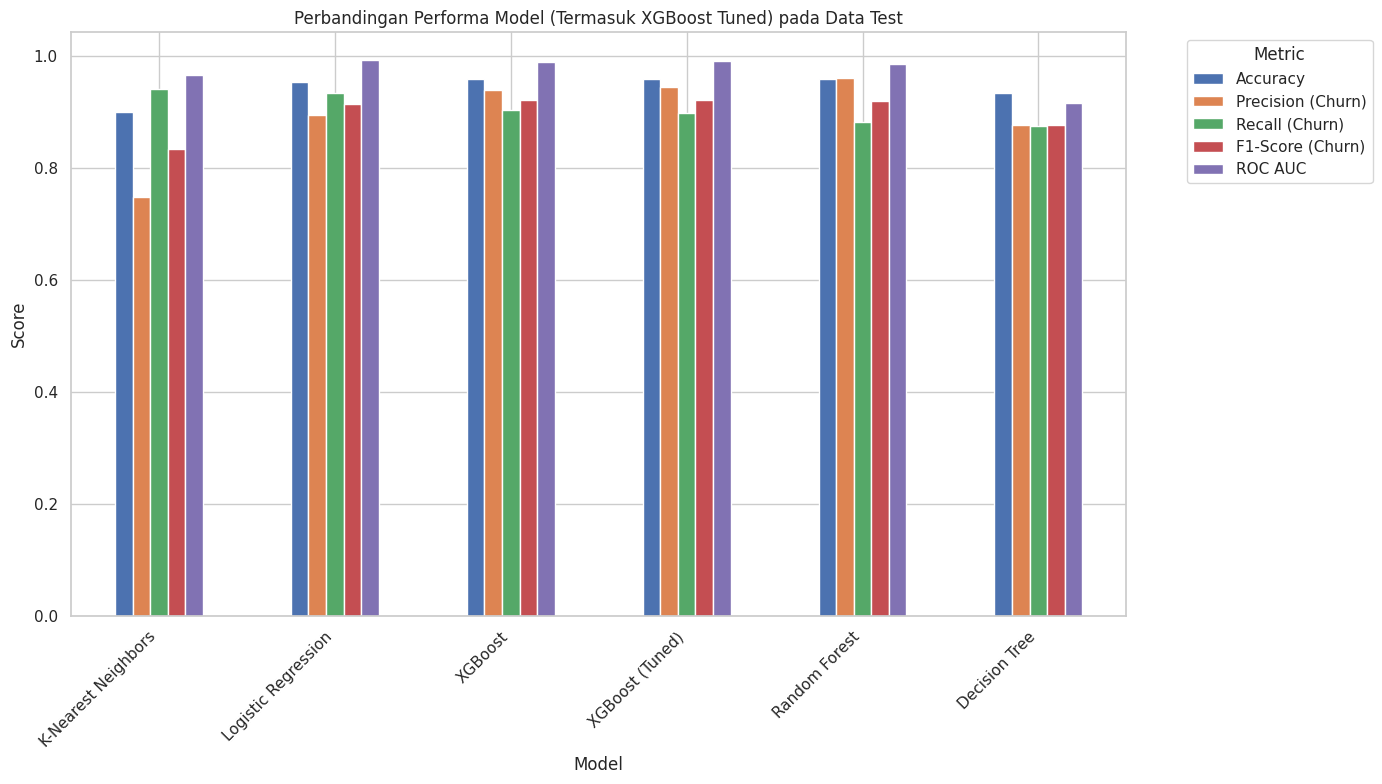


--- Hasil Akhir Perbandingan Model (Termasuk XGBoost Tuned) ---
                     Accuracy  Precision (Churn)  Recall (Churn)  \
Model                                                              
K-Nearest Neighbors  0.899929           0.747346        0.941176   
Logistic Regression  0.953158           0.894872        0.933155   
XGBoost              0.958836           0.938889        0.903743   
XGBoost (Tuned)      0.958836           0.943820        0.898396   
Random Forest        0.958836           0.959302        0.882353   
Decision Tree        0.933996           0.876676        0.874332   

                     F1-Score (Churn)   ROC AUC  
Model                                            
K-Nearest Neighbors          0.833136  0.966262  
Logistic Regression          0.913613  0.992007  
XGBoost                      0.920981  0.989062  
XGBoost (Tuned)              0.920548  0.989741  
Random Forest                0.919220  0.984288  
Decision Tree                0.875502  0

In [17]:
# Tambahkan hasil XGBoost tuned ke DataFrame hasil
xgb_tuned_results = {
    'Model': 'XGBoost (Tuned)',
    'Accuracy': accuracy_score(y_test, y_pred_tuned),
    'Precision (Churn)': precision_score(y_test, y_pred_tuned, pos_label=1),
    'Recall (Churn)': recall_score(y_test, y_pred_tuned, pos_label=1),
    'F1-Score (Churn)': f1_score(y_test, y_pred_tuned, pos_label=1),
    'ROC AUC': roc_auc_score(y_test, y_proba_tuned)
}

# Gabungkan DataFrame hasil awal dengan hasil XGBoost tuned
# Pastikan kolomnya sama
results_df_combined = pd.concat([results_df.reset_index(), pd.DataFrame([xgb_tuned_results])], ignore_index=True)

# Urutkan berdasarkan Recall (Churn) atau metrik lain jika diinginkan
results_df_combined = results_df_combined.sort_values(by='Recall (Churn)', ascending=False)

# Pilih metrik yang ingin divisualisasikan
metrics_to_plot_combined = ['Accuracy', 'Precision (Churn)', 'Recall (Churn)', 'F1-Score (Churn)', 'ROC AUC']

# Plot grafik batang
ax = results_df_combined.set_index('Model')[metrics_to_plot_combined].plot(kind='bar', figsize=(14, 8))
plt.title('Perbandingan Performa Model (Termasuk XGBoost Tuned) pada Data Test')
plt.ylabel('Score')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Tampilkan tabel hasil gabungan
print("\n--- Hasil Akhir Perbandingan Model (Termasuk XGBoost Tuned) ---")
print(results_df_combined.set_index('Model'))

## 📊 Ringkasan Kinerja Model

| Model                 | Accuracy | Precision | Recall | F1-Score | ROC AUC |
|----------------------|----------|-----------|--------|----------|---------|
| K-Nearest Neighbors  | 0.8999   | 0.7473    | 0.9412 | 0.8331   | 0.9663  |
| Logistic Regression  | 0.9532   | 0.8949    | 0.9332 | 0.9136   | 0.9920  |
| XGBoost              | 0.9588   | 0.9389    | 0.9037 | 0.9210   | 0.9891  |
| XGBoost (Tuned)      | 0.9588   | 0.9438    | 0.8984 | 0.9205   | 0.9897  |
| Random Forest        | 0.9588   | 0.9593    | 0.8824 | 0.9192   | 0.9843  |
| Decision Tree        | 0.9340   | 0.8767    | 0.8743 | 0.8755   | 0.9149  |

---

## 🔍 Analisis Per Model

### 1. **K-Nearest Neighbors (KNN)**
- **Kelebihan**: Recall tertinggi (0.9412), artinya sangat baik dalam mendeteksi pelanggan yang benar-benar churn.
- **Kekurangan**: Precision rendah (0.7473), menunjukkan banyak false positives.
- **Kesimpulan**: Cocok jika tujuan utama adalah meminimalkan false negatives (misalnya, mencegah kehilangan pelanggan).

### 2. **Logistic Regression**
- **Keseimbangan**: Sangat seimbang antara precision dan recall, dengan F1-score tinggi (0.9136).
- **ROC AUC tertinggi**: 0.9920, menunjukkan kemampuan diskriminatif yang sangat baik.
- **Kesimpulan**: Model baseline yang kuat dan efisien, cocok untuk deployment awal.

### 3. **XGBoost**
- **Performa tinggi**: Accuracy dan F1-score sangat baik, dengan ROC AUC mendekati Logistic Regression.
- **Recall sedikit lebih tinggi dari versi tuned**.
- **Kesimpulan**: Sudah sangat optimal bahkan sebelum tuning.

### 4. **XGBoost (Tuned)**
- **Precision tertinggi kedua (0.9438)** dan ROC AUC tertinggi kedua (0.9897).
- **Recall sedikit menurun dibanding XGBoost default**.
- **Kesimpulan**: Tuning meningkatkan precision, cocok untuk kasus di mana false positives lebih merugikan.

### 5. **Random Forest**
- **Precision tertinggi (0.9593)**, sangat konservatif dalam memprediksi churn.
- **Recall paling rendah di antara top 3 model**.
- **Kesimpulan**: Cocok untuk aplikasi yang mengutamakan kepastian prediksi churn.

### 6. **Decision Tree**
- **Performa paling rendah** di antara semua model, baik dari segi accuracy maupun ROC AUC.
- **Kesimpulan**: Meskipun mudah diinterpretasi, kurang cocok untuk deployment tanpa ensemble.



In [20]:
import joblib

# Tentukan nama file untuk menyimpan model
xgboost_fix = 'best_xgboost_model.pkl'

# Simpan model terbaik (best_model dari grid search)
joblib.dump(best_model, xgboost_fix)

print(f"Model terbaik (XGBoost tuned) berhasil disimpan sebagai: {xgboost_fix}")


Model terbaik (XGBoost tuned) berhasil disimpan sebagai: best_xgboost_model.pkl


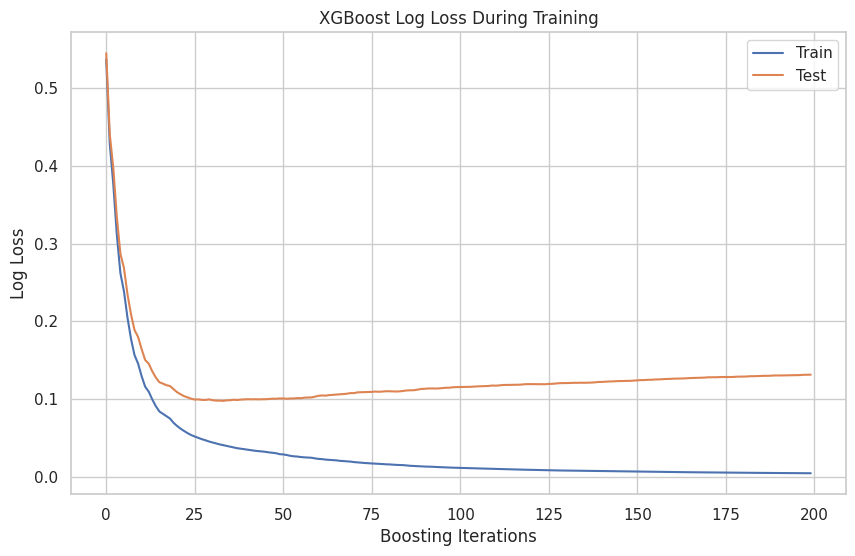

In [18]:
# Ambil hasil evaluasi dari objek model yang dilatih dengan eval_set
# Pastikan nama objeknya sesuai dengan yang digunakan di sel sebelumnya (xgb_for_plot)
results = eval_results.evals_result()

# Plot metrik performa selama training
epochs = len(results['validation_0']['logloss']) # Ambil jumlah epoch/iterasi
x_axis = range(0, epochs)

plt.figure(figsize=(10, 6))
plt.plot(x_axis, results['validation_0']['logloss'], label='Train')
plt.plot(x_axis, results['validation_1']['logloss'], label='Test') # validation_1 adalah data test
plt.legend()
plt.ylabel('Log Loss')
plt.xlabel('Boosting Iterations')
plt.title('XGBoost Log Loss During Training')
plt.grid(True)
plt.show()

In [27]:
print("Membuat DataFrame hasil analisis...")

# 1. Buat DataFrame baru dari X_test (data mentah, human-readable)
# PENTING: .reset_index()
df_hasil = X_test.reset_index(drop=True)

# 2. Gabungkan dengan y_test
df_hasil['Actual Churn'] = y_test.reset_index(drop=True)

# 3. Tambahkan hasil prediksi model
# Gunakan y_pred_tuned dan y_proba_tuned dari model terbaik yang sudah di-tuning
df_hasil['Predicted Churn'] = y_pred_tuned
df_hasil['Churn Probability'] = y_proba_tuned

# 4. Tambahkan kolom analisis
df_hasil['Prediction Correct?'] = (df_hasil['Actual Churn'] == df_hasil['Predicted Churn'])

# 5. Tambahkan kolom Tipe Prediksi (sangat berguna!)
def prediction_type(row):
    if row['Actual Churn'] == 1 and row['Predicted Churn'] == 1:
        return 'True Positive'
    elif row['Actual Churn'] == 0 and row['Predicted Churn'] == 1:
        return 'False Positive' # (Ini yang merugikan tim retensi)
    elif row['Actual Churn'] == 1 and row['Predicted Churn'] == 0:
        return 'False Negative' # (Ini pelanggan 'kecolongan')
    else:
        return 'True Negative'

df_hasil['Prediction Type'] = df_hasil.apply(prediction_type, axis=1)

# 6. Simpan ke CSV
output_filename = 'xgboost_predictions_analysis.csv'
df_hasil.to_csv(output_filename, index=False)

print(f"Berhasil! File analisis disimpan sebagai: {output_filename}")
print("\nContoh 10 baris pertama dari file hasil:")
print(df_hasil.head(10))

Membuat DataFrame hasil analisis...
Berhasil! File analisis disimpan sebagai: xgboost_predictions_analysis.csv

Contoh 10 baris pertama dari file hasil:
   Gender  Age Under 30 Senior Citizen Married Dependents  \
0    Male   74       No            Yes      No         No   
1  Female   55       No             No     Yes        Yes   
2  Female   60       No             No     Yes         No   
3  Female   62       No             No     Yes        Yes   
4  Female   61       No             No     Yes        Yes   
5    Male   61       No             No      No        Yes   
6  Female   64       No             No      No         No   
7    Male   34       No             No      No         No   
8    Male   22      Yes             No      No         No   
9    Male   65       No            Yes      No         No   

   Number of Dependents Referred a Friend  Number of Referrals  \
0                     0                No                    0   
1                     3               Yes  